In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 4.0 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.7/409.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.21
    Uninstalling langchain-core-0.3.21:
      Successfully uninstalled langchain-core-0.3.21
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.9
    Uninstalling langchain-0.3.9:
      Successfully uninstalled langchain-0.3.9


In [4]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 4.5 MB/s eta 0:00:00


In [8]:
from google.colab import userdata
import os
GROQ_API_KEY = userdata.get('GROQ_API')
os.environ['GROQ_API_KEY'] = GROQ_API_KEY
LANGSMITH_API_KEY = userdata.get('LANGSMITH_API')
os.environ['LANGSMITH_API_KEY'] = LANGSMITH_API_KEY

In [9]:
os.environ['LANGCHAIN_API'] = LANGSMITH_API_KEY
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'LANGGRAPH PROJECT'

In [10]:
from langchain_groq import ChatGroq

In [11]:
llm = ChatGroq(model = 'gemma2-9b-it')

##CHATBOT USING LANGGRAPH


In [14]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [19]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [21]:
def chatbot(state:State):
  return{"messages":llm.invoke(state['messages'])}

In [22]:
graph_builder.add_node("chatbot", chatbot)

In [23]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [24]:
graph = graph_builder.compile()

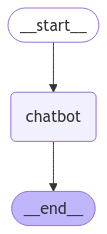

In [26]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  pass

In [31]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break
  for event in graph.stream({"messages":("user", user_input)}):
    # print(event.values())
    for values in event.values():
      # print(values["messages"])
      print("Assistant: ", values["messages"].content)

User: Who is the founder of Apple?
Assistant:  Apple was founded by **Steve Jobs, Steve Wozniak, and Ronald Wayne**. 

User: q
Good Bye
